<h1>Interpolate FC cost term data</h1>

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FC.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')


,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,4.103561e+09
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,2.904902e+09
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,2.397848e+09
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,FC,700,1,1,2.480737e+08
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,FC,675,2,1,4.197227e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54089 non-null  object        
 1   PARTY_ID      54089 non-null  object        
 2   PARTY_ID_EN   54089 non-null  int64         
 3   PARTY_NAME    54089 non-null  object        
 4   CSL_ID        54089 non-null  object        
 5   ETA_ETD_NO    54089 non-null  int64         
 6   ETD_POL_D     54089 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54089 non-null  datetime64[ns]
 9   CNTR_ID       54089 non-null  object        
 10  CNTR_SIZE     54089 non-null  object        
 11  CNTR_TYPE     54089 non-null  object        
 12  COST_TERM     54089 non-null  object        
 13  RATE          54089 non-null  int32         
 14  ENCODED_TYPE  54089 non-null  int32         
 15  ENCODED_TERM  54089 non-null  int64 

<h4>Checking if dataset still contains any NAN values after datacleaning using SQL</h4>

In [236]:
if df.isna().any().any():
    print('Dataframe contains NaN values')
else:
    print('Dataframe does not contain NaN values')

Dataframe contains NaN values


<h4>Removing rows contains NAN values</h4>

In [237]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   PARTY_ID      54083 non-null  object        
 2   PARTY_ID_EN   54083 non-null  int64         
 3   PARTY_NAME    54083 non-null  object        
 4   CSL_ID        54083 non-null  object        
 5   ETA_ETD_NO    54083 non-null  int64         
 6   ETD_POL_D     54083 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54083 non-null  datetime64[ns]
 9   CNTR_ID       54083 non-null  object        
 10  CNTR_SIZE     54083 non-null  object        
 11  CNTR_TYPE     54083 non-null  object        
 12  COST_TERM     54083 non-null  object        
 13  RATE          54083 non-null  int32         
 14  ENCODED_TYPE  54083 non-null  int32         
 15  ENCODED_TERM  54083 non-null  int64 

In [238]:
print(df.keys())

Index(['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'COST_TERM', 'RATE', 'ENCODED_TYPE', 'ENCODED_TERM',
       'POD_ID_EN'],
      dtype='object')


In [239]:
sel_col = ['COM_ID','CSL_ID', 'CNTR_ID','ENCODED_TERM','COST_TERM','POD_ID','ETD_POL_D','PARTY_ID',
           'PARTY_ID_EN', 'PARTY_NAME','POD_ID_EN','ETA_ETD_NO','POD',
           'CNTR_SIZE','ENCODED_TYPE','CNTR_TYPE','RATE']

df_fc = df_clean[sel_col]
df_fc.head()
df_fc.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010060100191,CTNR010060201232,1,FC,HELSINKI,FIHEL,010003678,10003678,OY TAVATUR SHIPPING LTD,4.103561e+09,20060228,2006-02-28,20,2,GP,675
1,010,ECS010060100465,CTNR010060300014,1,FC,BUSAN,KRPUS,010004286,10004286,"GLOBELINK KOREA CO., LTD",2.904902e+09,20060303,2006-03-03,40,1,HC,390
2,010,ECS010060100321,CTNR010060201198,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20060227,2006-02-27,40,4,HC NOR,1615
3,010,ECS010060200201,CTNR010060300119,1,FC,ADELAIDE,AUADL,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,2.480737e+08,20060306,2006-03-06,40,1,HC,700
4,010,ECS010060200146,CTNR010060300185,1,FC,MARSEILLE,FRMRS,01001088,1001088,CARGO LINES S.A.-LE HAVRE,4.197227e+08,20060307,2006-03-07,20,2,GP,675


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   CSL_ID        54083 non-null  object        
 2   CNTR_ID       54083 non-null  object        
 3   ENCODED_TERM  54083 non-null  int64         
 4   COST_TERM     54083 non-null  object        
 5   POD_ID        54083 non-null  object        
 6   ETD_POL_D     54083 non-null  object        
 7   PARTY_ID      54083 non-null  object        
 8   PARTY_ID_EN   54083 non-null  int64         
 9   PARTY_NAME    54083 non-null  object        
 10  POD_ID_EN     54083 non-null  float64       
 11  ETA_ETD_NO    54083 non-null  int64         
 12  POD           54083 non-null  datetime64[ns]
 13  CNTR_SIZE     54083 non-null  object        
 14  ENCODED_TYPE  54083 non-null  int32         
 15  CNTR_TYPE     54083 non-null  object

In [240]:
# interpolate missing values
df_fc['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2002, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [241]:
# Sorting by date so can interpolate the missing dates while using cost median 
df_fc = df_fc.sort_values(by='POD').reset_index()
df_fc.head()
df_fc['POD'].dt.year.unique()

,index,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,4666,010,ECS010071200653,CTNR010080100817,1,FC,LATKRABANG,THLKR,01002799,1002799,GLS INTERFREIGHT CO.LTD,2.524904e+09,20020117,2002-01-17,20,2,GP,180
1,1357,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3.241651e+09,20050715,2005-07-15,40,4,HC NOR,1620
2,2370,010,ECS01050600163,CTNR010050700370,1,FC,PASIR GUDANG,MYPGU,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,3.870912e+09,20050715,2005-07-15,40,1,HC,280
3,4669,010,ECS01050600610,CTNR010050700353,1,FC,FELIXSTOWE,GBFXT,01002303,1002303,GLOBELINK FALLOW LIMITED,9.417223e+08,20050715,2005-07-15,40,2,GP,1800
4,4668,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,2005-07-15,40,4,HC NOR,2170


array([2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<h3>Interpolate to fill the missing data gap</h3>

<Axes: xlabel='POD'>

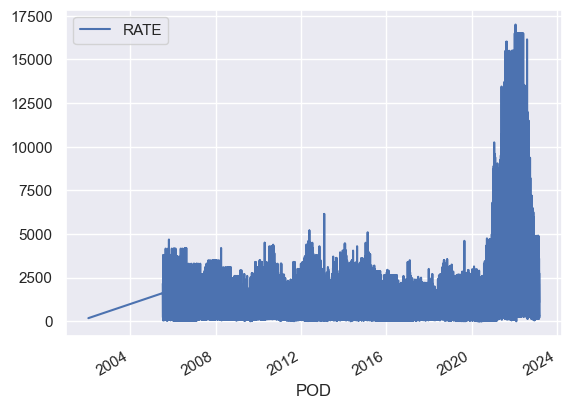

In [242]:
interpolated_data = df_fc.interpolate(method='ffill')
interpolated_data.plot(x='POD', y='RATE')
plt.show()

In [243]:
# Removing rows that contains year 2002
df2 = interpolated_data.loc[interpolated_data['POD'].dt.year != 2002].reset_index(drop=True)
df2.head()
df2.info()

,index,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,1357,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3.241651e+09,20050715,2005-07-15,40,4,HC NOR,1620
1,2370,010,ECS01050600163,CTNR010050700370,1,FC,PASIR GUDANG,MYPGU,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,3.870912e+09,20050715,2005-07-15,40,1,HC,280
2,4669,010,ECS01050600610,CTNR010050700353,1,FC,FELIXSTOWE,GBFXT,01002303,1002303,GLOBELINK FALLOW LIMITED,9.417223e+08,20050715,2005-07-15,40,2,GP,1800
3,4668,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,2005-07-15,40,4,HC NOR,2170
4,340,010,ECS01050600325,CTNR010050700379,1,FC,BUSAN,KRPUS,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,2.904902e+09,20050716,2005-07-16,20,2,GP,220


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54082 entries, 0 to 54081
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         54082 non-null  int64         
 1   COM_ID        54082 non-null  object        
 2   CSL_ID        54082 non-null  object        
 3   CNTR_ID       54082 non-null  object        
 4   ENCODED_TERM  54082 non-null  int64         
 5   COST_TERM     54082 non-null  object        
 6   POD_ID        54082 non-null  object        
 7   ETD_POL_D     54082 non-null  object        
 8   PARTY_ID      54082 non-null  object        
 9   PARTY_ID_EN   54082 non-null  int64         
 10  PARTY_NAME    54082 non-null  object        
 11  POD_ID_EN     54082 non-null  float64       
 12  ETA_ETD_NO    54082 non-null  int64         
 13  POD           54082 non-null  datetime64[ns]
 14  CNTR_SIZE     54082 non-null  object        
 15  ENCODED_TYPE  54082 non-null  int32 

<Axes: xlabel='POD'>

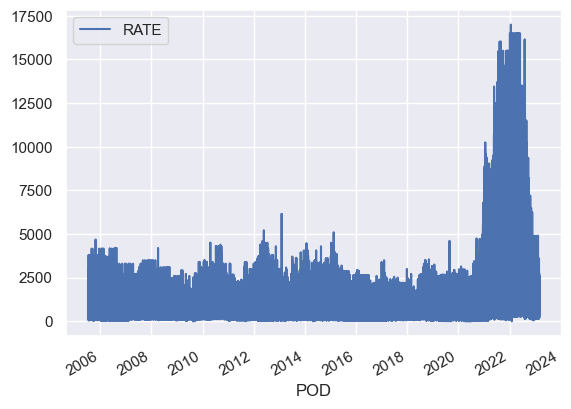

In [244]:
df2.plot(x='POD', y='RATE')
plt.show()

In [245]:
# Checking for negative cost rate
for values in df2['RATE']:
    if values <= 0:
        print(values)

0
0


In [246]:
df3 = df2.loc[df2['RATE'] > 0].reset_index(drop=True)
df3.head()
df3.info()

,index,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,1357,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3.241651e+09,20050715,2005-07-15,40,4,HC NOR,1620
1,2370,010,ECS01050600163,CTNR010050700370,1,FC,PASIR GUDANG,MYPGU,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,3.870912e+09,20050715,2005-07-15,40,1,HC,280
2,4669,010,ECS01050600610,CTNR010050700353,1,FC,FELIXSTOWE,GBFXT,01002303,1002303,GLOBELINK FALLOW LIMITED,9.417223e+08,20050715,2005-07-15,40,2,GP,1800
3,4668,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,2005-07-15,40,4,HC NOR,2170
4,340,010,ECS01050600325,CTNR010050700379,1,FC,BUSAN,KRPUS,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,2.904902e+09,20050716,2005-07-16,20,2,GP,220


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54080 entries, 0 to 54079
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         54080 non-null  int64         
 1   COM_ID        54080 non-null  object        
 2   CSL_ID        54080 non-null  object        
 3   CNTR_ID       54080 non-null  object        
 4   ENCODED_TERM  54080 non-null  int64         
 5   COST_TERM     54080 non-null  object        
 6   POD_ID        54080 non-null  object        
 7   ETD_POL_D     54080 non-null  object        
 8   PARTY_ID      54080 non-null  object        
 9   PARTY_ID_EN   54080 non-null  int64         
 10  PARTY_NAME    54080 non-null  object        
 11  POD_ID_EN     54080 non-null  float64       
 12  ETA_ETD_NO    54080 non-null  int64         
 13  POD           54080 non-null  datetime64[ns]
 14  CNTR_SIZE     54080 non-null  object        
 15  ENCODED_TYPE  54080 non-null  int32 

(array([8.69871039, 6.3757366 , 8.84379209, ..., 9.36981786, 7.90127367,
       6.46376681]), 0.04298188352348008)


(array([[3.0000e+00, 1.0000e+01, 2.1000e+02, 9.1000e+02, 6.2570e+03,
         1.1116e+04, 1.9105e+04, 1.2197e+04, 2.6440e+03, 1.6280e+03],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([ 0.        ,  1.20972308,  2.41944615,  3.62916923,  4.8388923 ,
         6.04861538,  7.25833845,  8.46806153,  9.6777846 , 10.88750768,
        12.09723075]),
 <a list of 2 BarContainer objects>)

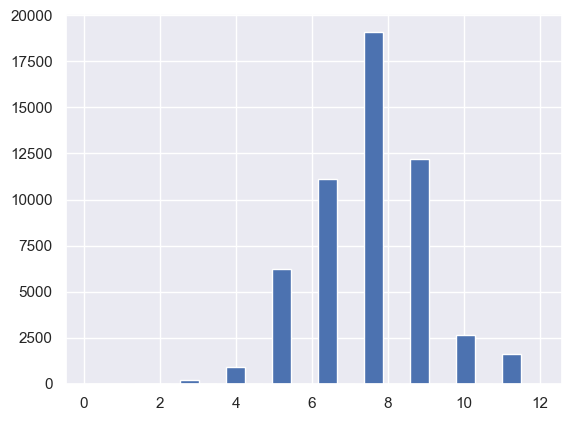

In [247]:
from scipy.stats import boxcox

# Doing symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median
lambda_ = boxcox(df3['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

<p>Negatively skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean. </p>

In [248]:
aggregation = {'COM_ID': lambda x: x.iloc[0], 
               'CSL_ID': lambda x: x.iloc[0],
               'CNTR_ID': lambda x: x.iloc[0],
               'ENCODED_TERM': lambda x: x.iloc[0],
               'COST_TERM': lambda x: x.iloc[0],
               'POD_ID': lambda x: x.iloc[0],
               'ETD_POL_D': lambda x: x.iloc[0],
               'PARTY_ID': lambda x: x.iloc[0],
               'PARTY_ID_EN': lambda x: x.iloc[0],
               'PARTY_NAME': lambda x: x.iloc[0],
               'POD_ID_EN': lambda x: x.iloc[0],
               'ETA_ETD_NO': lambda x: x.iloc[0],
               'CNTR_SIZE': lambda x: x.iloc[0],
               'ENCODED_TYPE': lambda x: x.iloc[0],
               'CNTR_TYPE': lambda x: x.iloc[0], 
               'RATE': 'median'}

# perform the aggregation and reset the index
df4 = df3.groupby('POD').agg(aggregation).reset_index()
df4.head()
df4.info()

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2005-07-15,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3.241651e+09,20050715,40,4,HC NOR,1710.0
1,2005-07-16,010,ECS01050600325,CTNR010050700379,1,FC,BUSAN,KRPUS,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,2.904902e+09,20050716,20,2,GP,862.5
2,2005-07-17,010,ECS010050700025,CTNR010050700537,1,FC,HOCHIMINH CITY ( TAN CANG ),VNSGN,01004649,1004649,M & P INTERNATIONAL CO LTD-HO CHI MINH,2.072622e+09,20050717,40,1,HC,315.0
3,2005-07-18,010,ECS01050600497,CTNR010050700510,1,FC,"MANZANILLO , MEXICO",MXZLO,01008144,1008144,TRANSLOGISTICS SA DE CV,2.460062e+09,20050718,40,2,GP,3300.0
4,2005-07-19,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050719,40,1,HC,850.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6339 non-null   datetime64[ns]
 1   COM_ID        6339 non-null   object        
 2   CSL_ID        6339 non-null   object        
 3   CNTR_ID       6339 non-null   object        
 4   ENCODED_TERM  6339 non-null   int64         
 5   COST_TERM     6339 non-null   object        
 6   POD_ID        6339 non-null   object        
 7   ETD_POL_D     6339 non-null   object        
 8   PARTY_ID      6339 non-null   object        
 9   PARTY_ID_EN   6339 non-null   int64         
 10  PARTY_NAME    6339 non-null   object        
 11  POD_ID_EN     6339 non-null   float64       
 12  ETA_ETD_NO    6339 non-null   int64         
 13  CNTR_SIZE     6339 non-null   object        
 14  ENCODED_TYPE  6339 non-null   int32         
 15  CNTR_TYPE     6339 non-null   object  

<Axes: xlabel='POD'>

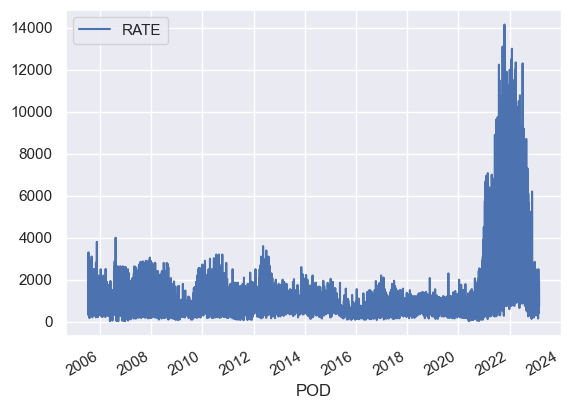

In [249]:
df4.plot(x='POD', y='RATE')
plt.show()

<h3>Casting All to INT32 Type</h3>

In [250]:
df4['CNTR_SIZE'] = df4['CNTR_SIZE'].astype(np.int32)
df4['RATE'] = df4['RATE'].astype(np.int32)
df4['PARTY_ID_EN'] = df4['PARTY_ID_EN'].astype(np.int32)
df4['POD_ID_EN'] = df4['POD_ID_EN'].astype(np.int64)
df4['ETA_ETD_NO'] = df4['ETA_ETD_NO'].astype(np.int32)
df4.info()
df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6339 non-null   datetime64[ns]
 1   COM_ID        6339 non-null   object        
 2   CSL_ID        6339 non-null   object        
 3   CNTR_ID       6339 non-null   object        
 4   ENCODED_TERM  6339 non-null   int64         
 5   COST_TERM     6339 non-null   object        
 6   POD_ID        6339 non-null   object        
 7   ETD_POL_D     6339 non-null   object        
 8   PARTY_ID      6339 non-null   object        
 9   PARTY_ID_EN   6339 non-null   int32         
 10  PARTY_NAME    6339 non-null   object        
 11  POD_ID_EN     6339 non-null   int64         
 12  ETA_ETD_NO    6339 non-null   int32         
 13  CNTR_SIZE     6339 non-null   int32         
 14  ENCODED_TYPE  6339 non-null   int32         
 15  CNTR_TYPE     6339 non-null   object  

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2005-07-15,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3241651053,20050715,40,4,HC NOR,1710
1,2005-07-16,010,ECS01050600325,CTNR010050700379,1,FC,BUSAN,KRPUS,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,2904901796,20050716,20,2,GP,862
2,2005-07-17,010,ECS010050700025,CTNR010050700537,1,FC,HOCHIMINH CITY ( TAN CANG ),VNSGN,01004649,1004649,M & P INTERNATIONAL CO LTD-HO CHI MINH,2072622400,20050717,40,1,HC,315
3,2005-07-18,010,ECS01050600497,CTNR010050700510,1,FC,"MANZANILLO , MEXICO",MXZLO,01008144,1008144,TRANSLOGISTICS SA DE CV,2460062351,20050718,40,2,GP,3300
4,2005-07-19,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,40,1,HC,850


<h4>Removing Dates from 2023 onwards as 2023 is used to test test the accuracy of the cost rate forecast.</h4>

<Figure size 6000x2000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 6000x2000 with 0 Axes>

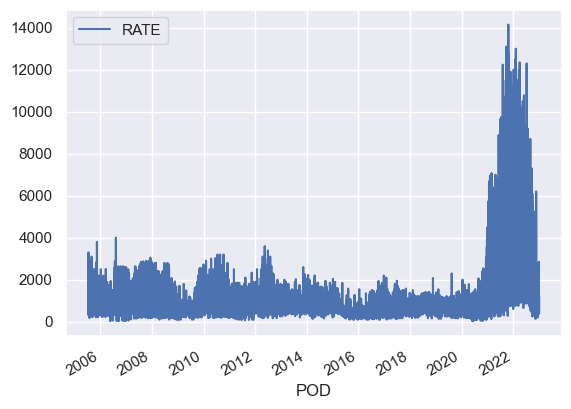

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2005-07-15,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3241651053,20050715,40,4,HC NOR,1710
1,2005-07-16,010,ECS01050600325,CTNR010050700379,1,FC,BUSAN,KRPUS,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,2904901796,20050716,20,2,GP,862
2,2005-07-17,010,ECS010050700025,CTNR010050700537,1,FC,HOCHIMINH CITY ( TAN CANG ),VNSGN,01004649,1004649,M & P INTERNATIONAL CO LTD-HO CHI MINH,2072622400,20050717,40,1,HC,315
3,2005-07-18,010,ECS01050600497,CTNR010050700510,1,FC,"MANZANILLO , MEXICO",MXZLO,01008144,1008144,TRANSLOGISTICS SA DE CV,2460062351,20050718,40,2,GP,3300
4,2005-07-19,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,40,1,HC,850


0      2005-07-15
1      2005-07-16
2      2005-07-17
3      2005-07-18
4      2005-07-19
          ...    
6277   2022-12-27
6278   2022-12-28
6279   2022-12-29
6280   2022-12-30
6281   2022-12-31
Name: POD, Length: 6282, dtype: datetime64[ns]


In [251]:
# Filter out the rows with a date in 2023
df_before_2023 = df4[df4['POD'] < '2023-01-01'].reset_index(drop=True)
df_2023_and_after = df4[df4['POD'] >= '2023-01-01'].reset_index(drop=True)


plt.figure(figsize=(60, 20))
df_before_2023.plot(x='POD', y='RATE')
plt.show()
df_before_2023.head()
print(df_before_2023['POD'])

<Figure size 6000x3000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 6000x3000 with 0 Axes>

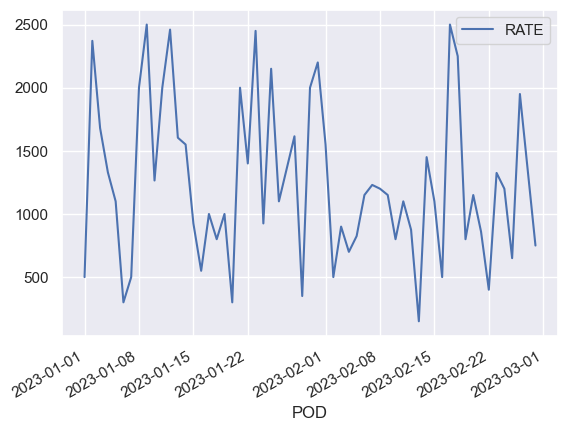

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2023-01-01,010,ECS010221100213,010000287940,1,FC,COLOMBO,LKCMB,01001668,1001668,CWT GLOBELINK COLOMBO PVT LTD,2432422134,20230101,40,1,HC,500
1,2023-01-02,010,ECS010221100385,010000292272,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20230102,40,1,HC,2371
2,2023-01-03,010,ECS010221200407,010000299456,1,FC,"HOCHIMINH CAT LAI,VIETNAM",VNCLI,010005256,10005256,GLOBELINK VIETNAM CO. LTD-HO CHI MINH,2047096572,20230103,40,1,HC,1680
3,2023-01-04,010,ECS010221100328,010000296878,1,FC,POTI,GEPTI,010021426,10021426,F.S. MACKENZIE LTD - GEORGIA,1304690338,20230104,40,1,HC,1330
4,2023-01-05,010,ECS010221200074,010000303569,1,FC,BUENOS AIRES,ARBUE,010006300,10006300,CRAFT ARGENTINA SA,3071034958,20230105,40,1,HC,1100


0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
5    2023-01-06
6    2023-01-07
7    2023-01-08
8    2023-01-09
9    2023-01-10
10   2023-01-11
11   2023-01-12
12   2023-01-13
13   2023-01-14
14   2023-01-15
15   2023-01-16
16   2023-01-17
17   2023-01-18
18   2023-01-19
19   2023-01-20
20   2023-01-21
21   2023-01-22
22   2023-01-23
23   2023-01-24
24   2023-01-25
25   2023-01-26
26   2023-01-28
27   2023-01-29
28   2023-01-30
29   2023-01-31
30   2023-02-01
31   2023-02-02
32   2023-02-03
33   2023-02-04
34   2023-02-05
35   2023-02-06
36   2023-02-07
37   2023-02-08
38   2023-02-09
39   2023-02-10
40   2023-02-11
41   2023-02-12
42   2023-02-13
43   2023-02-14
44   2023-02-15
45   2023-02-16
46   2023-02-17
47   2023-02-18
48   2023-02-19
49   2023-02-20
50   2023-02-21
51   2023-02-22
52   2023-02-23
53   2023-02-24
54   2023-02-25
55   2023-02-26
56   2023-02-28
Name: POD, dtype: datetime64[ns]


In [252]:
plt.figure(figsize=(60, 30))
df_2023_and_after.plot(x='POD', y='RATE')
plt.show()
df_2023_and_after.head()
print(df_2023_and_after['POD'])

In [253]:
df_before_2023.info()
df_before_2023.to_csv('CR_FC_PREP_0522.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6282 non-null   datetime64[ns]
 1   COM_ID        6282 non-null   object        
 2   CSL_ID        6282 non-null   object        
 3   CNTR_ID       6282 non-null   object        
 4   ENCODED_TERM  6282 non-null   int64         
 5   COST_TERM     6282 non-null   object        
 6   POD_ID        6282 non-null   object        
 7   ETD_POL_D     6282 non-null   object        
 8   PARTY_ID      6282 non-null   object        
 9   PARTY_ID_EN   6282 non-null   int32         
 10  PARTY_NAME    6282 non-null   object        
 11  POD_ID_EN     6282 non-null   int64         
 12  ETA_ETD_NO    6282 non-null   int32         
 13  CNTR_SIZE     6282 non-null   int32         
 14  ENCODED_TYPE  6282 non-null   int32         
 15  CNTR_TYPE     6282 non-null   object  

In [254]:
df_2023_and_after.info()
df_2023_and_after.to_csv('CR_FC_PREP_23.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           57 non-null     datetime64[ns]
 1   COM_ID        57 non-null     object        
 2   CSL_ID        57 non-null     object        
 3   CNTR_ID       57 non-null     object        
 4   ENCODED_TERM  57 non-null     int64         
 5   COST_TERM     57 non-null     object        
 6   POD_ID        57 non-null     object        
 7   ETD_POL_D     57 non-null     object        
 8   PARTY_ID      57 non-null     object        
 9   PARTY_ID_EN   57 non-null     int32         
 10  PARTY_NAME    57 non-null     object        
 11  POD_ID_EN     57 non-null     int64         
 12  ETA_ETD_NO    57 non-null     int32         
 13  CNTR_SIZE     57 non-null     int32         
 14  ENCODED_TYPE  57 non-null     int32         
 15  CNTR_TYPE     57 non-null     object      

<ol>
    <li>There are total of 57 rows of data after and equal year 2023</li>
    <li>There are total of 6282 rows of data before year 2023</li>
<ol>
